In [36]:
import skimage as ski
import os
import matplotlib.pyplot as plt
import numpy as np

image_dir = os.path.normpath("C:/Users/bheineike/OneDrive - University College London/Microscope_data/2025-05-21_JB50_JB759_JB914_JB953_exponential")

savefig_dir = os.path.normpath("G:/.shortcut-targets-by-id/0B3ejcGO9fA5eYXlHMW9tekVERmc/JB labs documents/Updated_JB_documents_2019/JB LAB_Projects/biofilm_qtl/data/microscope/20250525_wild_strains_yes_emm_emm-p")


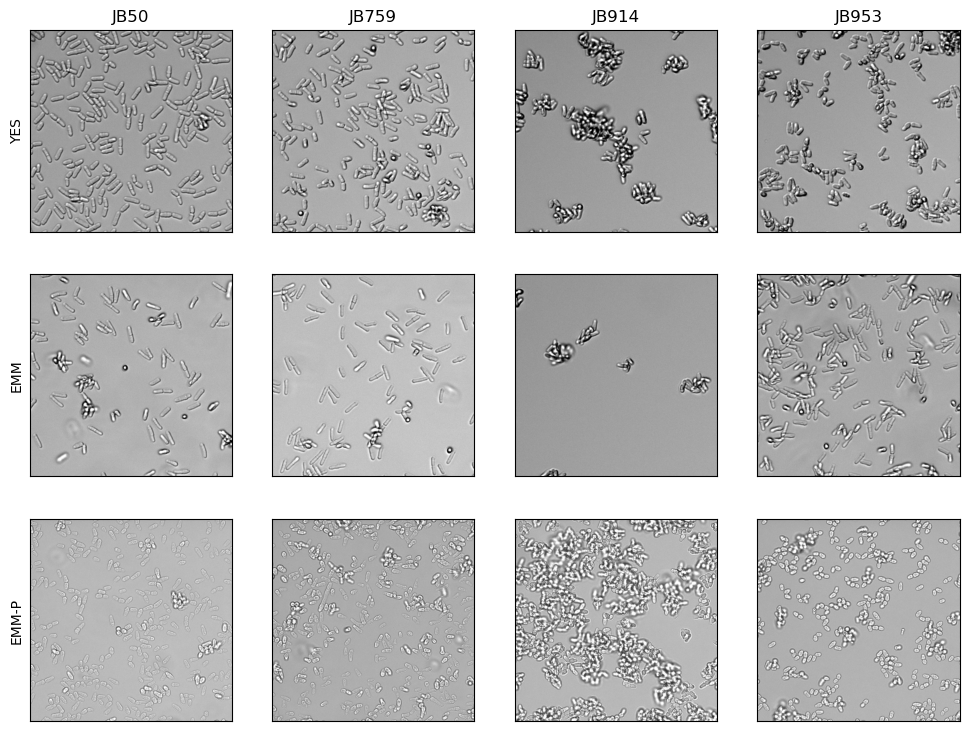

In [37]:
#Plot images in a 3x4 grid.  Adjust image range and select a subsection of the image. 

fig, axarr = plt.subplots(3,4, figsize=(12,9))

strains = ['JB50', 'JB759','JB914', 'JB953']
media = ['YES', 'EMM', 'EMM-P']

image_choice_lookup = {('JB50', 'YES'): (15,3), 
                       ('JB50', 'EMM'): (1,4),
                       ('JB50', 'EMM-P'): (2,2),
                       ('JB759', 'YES'): (11,3), 
                       ('JB759', 'EMM'): (6,1),
                       ('JB759', 'EMM-P'): (5,1),
                       ('JB914', 'YES'): (7,1), 
                       ('JB914', 'EMM'): (9,4),
                       ('JB914', 'EMM-P'): (9,3),
                       ('JB953', 'YES'): (3,3), 
                       ('JB953', 'EMM'): (13,2),
                       ('JB953', 'EMM-P'): (13,1)
                        }                   
                       


locations = {'EMM': (451,900,0,450),
             'YES': (0,450,0,450),
             'EMM-P': (0,900,0,900)
             }
             

pixel_ranges = {'EMM': (2000,8000), 
                'EMM-P': (0,1800), 
                'YES': (2000,8000)
                }


for jj, strain in enumerate(strains):
    for kk, medium in enumerate(media):
        
        ax = axarr[kk,jj]

        black_value, white_value = pixel_ranges[medium]
        location = locations[medium]
        #strain = 'JB50'
        #medium = 'YES'
        image_series, Z = image_choice_lookup[(strain,medium)]

        img_fname = image_dir + os.sep + os.path.normpath('tiff_images/' + strain + '_' + medium + '_Series' + str(image_series) + '_Z' + str(Z) + '.tif')

        img = ski.io.imread(img_fname)

        ax.imshow(img[location[0]:location[1],location[2]:location[3]], cmap = plt.cm.gray, vmin=black_value, vmax = white_value)
        #ax.axis('off')
        ax.set_xticks([])
        ax.set_yticks([])

        if jj==0: 
            ax.set_ylabel(medium)
        
        if kk==0: 
            ax.set_title(strain)


fig.savefig(savefig_dir + os.sep + '20250525_wild_strains_summary.svg')


(array([7.575000e+03, 2.077252e+06, 8.380190e+05, 6.923000e+03,
        9.200000e+02, 1.830000e+02, 4.600000e+01, 1.400000e+01,
        9.000000e+00, 3.000000e+00]),
 array([ 286. ,  810.6, 1335.2, 1859.8, 2384.4, 2909. , 3433.6, 3958.2,
        4482.8, 5007.4, 5532. ]),
 <BarContainer object of 10 artists>)

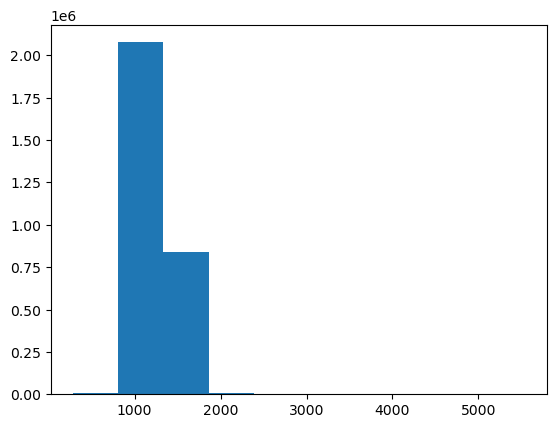

In [26]:
strain = 'JB50'
medium = 'EMM-P'
image_series, Z = image_choice_lookup[(strain,medium)]

img_fname = image_dir + os.sep + os.path.normpath('tiff_images/' + strain + '_' + medium + '_Series' + str(image_series) + '_Z' + str(Z) + '.tif')
img = ski.io.imread(img_fname)
a = np.asarray(img)
plt.hist(a.flatten())

(array([6.492000e+03, 2.814100e+04, 7.977300e+04, 2.780936e+06,
        2.698700e+04, 6.017000e+03, 1.926000e+03, 5.350000e+02,
        1.140000e+02, 2.300000e+01]),
 array([  592. ,  2142.5,  3693. ,  5243.5,  6794. ,  8344.5,  9895. ,
        11445.5, 12996. , 14546.5, 16097. ]),
 <BarContainer object of 10 artists>)

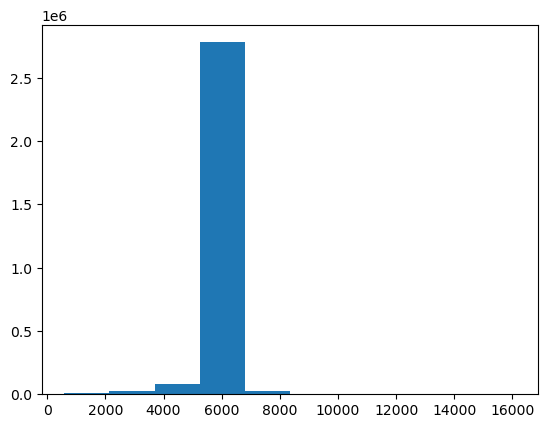

In [ ]:
img = ski.io.imread(os.path.normpath("C:/Users/bheineike/OneDrive - University College London/Microscope_data/2025-05-21_JB50_JB759_JB914_JB953_exponential/tiff_images/JB914_EMM_Series9_Z4.tif"))
tiff_images/JB914_EMM_Series9_Z4.tif")

a = np.asarray(img)
plt.hist(a.flatten())

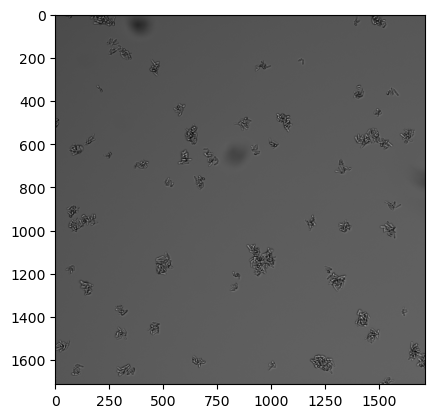

In [ ]:
plt.imshow(img, cmap = plt.cm.gray)

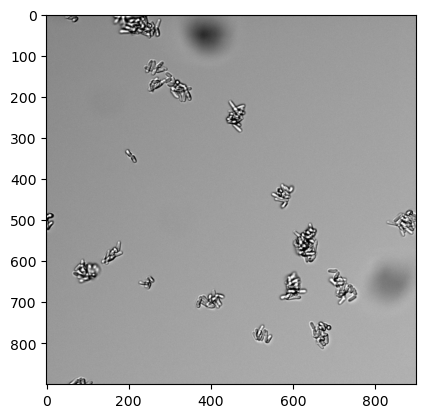

In [18]:
plt.imshow(img[0:900,0:900], cmap = plt.cm.gray, vmin=2000, vmax = 8000)

In [ ]:
#%gui qt5  #Need to load this to run Napari Gui
#import napari
#napari.settings.get_settings().plugins.extension2reader = {'*': 'napari-aicsimageio', **napari.settings.get_settings().plugins.extension2reader}
#viewer = napari.view_image(data.moon())